In [15]:
import qutip as qt
import numpy as np
import tqdm
import time
import warnings
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.gridspec import GridSpec
import sys
import yaml

sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/src')
import model_building as md
import Hamiltonian as Ham
import dynamics as dyn
import data_handling as dh
import plots as plots

In [16]:
one_step_if_dw = True
encoding = 'dw'

if encoding == 'dw':
    mode = "transport"
    one_step = one_step_if_dw
elif encoding == 'st':
    mode = "standard"
    one_step = False

In [43]:
# Define parameters
N=8
lmd = 0.02272
J_factor =20.75
J = lmd*J_factor

state_dictionary = {"1":1, "0":1}

ti = 0
tf = np.pi/lmd
Nsteps = 5000

T2 = 1e12
gamma = 1/T2 # sqrt(gamma) is in the decoherence operators, gamma has units of 1/T. if gamma = 0.01, T2=100ns

dephasing_rates = [gamma]*N

print("System size:", N)
print("J = ", J, "  λ = ", lmd)
print("Simulation time:", tf)

System size: 8
J =  0.47144   λ =  0.02272
Simulation time: 138.27432454180428


In [44]:
initial_state, target_state, reg_size = md.initialize_system(state_dictionary, N, encoding='dw', one_step=one_step)

H_t = Ham.Hamiltonian(
        system_size=N,
    mode=mode,
    lambda_factor=lmd,
    global_J=J,
    register_size=reg_size,
    j_error=0,
    l_error=0, 
    z_error=0
)

if one_step == False:
    H_r = Ham.Hamiltonian(
            system_size=N,
        mode="reset",
        lambda_factor=lmd,
        global_J=J,
        register_size=reg_size,
        j_error=0,
        l_error=0, 
        z_error=0
)


In [45]:
if (one_step == True) or (encoding == 'st'):
    fidelity, observables, corr_f = dyn.OneStepAlgorithm(initial_state, target_state, H_t, ti, tf, Nsteps)
elif one_step == False:
    fidelity, observables = dyn.TwoStepAlgorithm(initial_state, target_state, H_t, H_r, ti, tf, Nsteps)

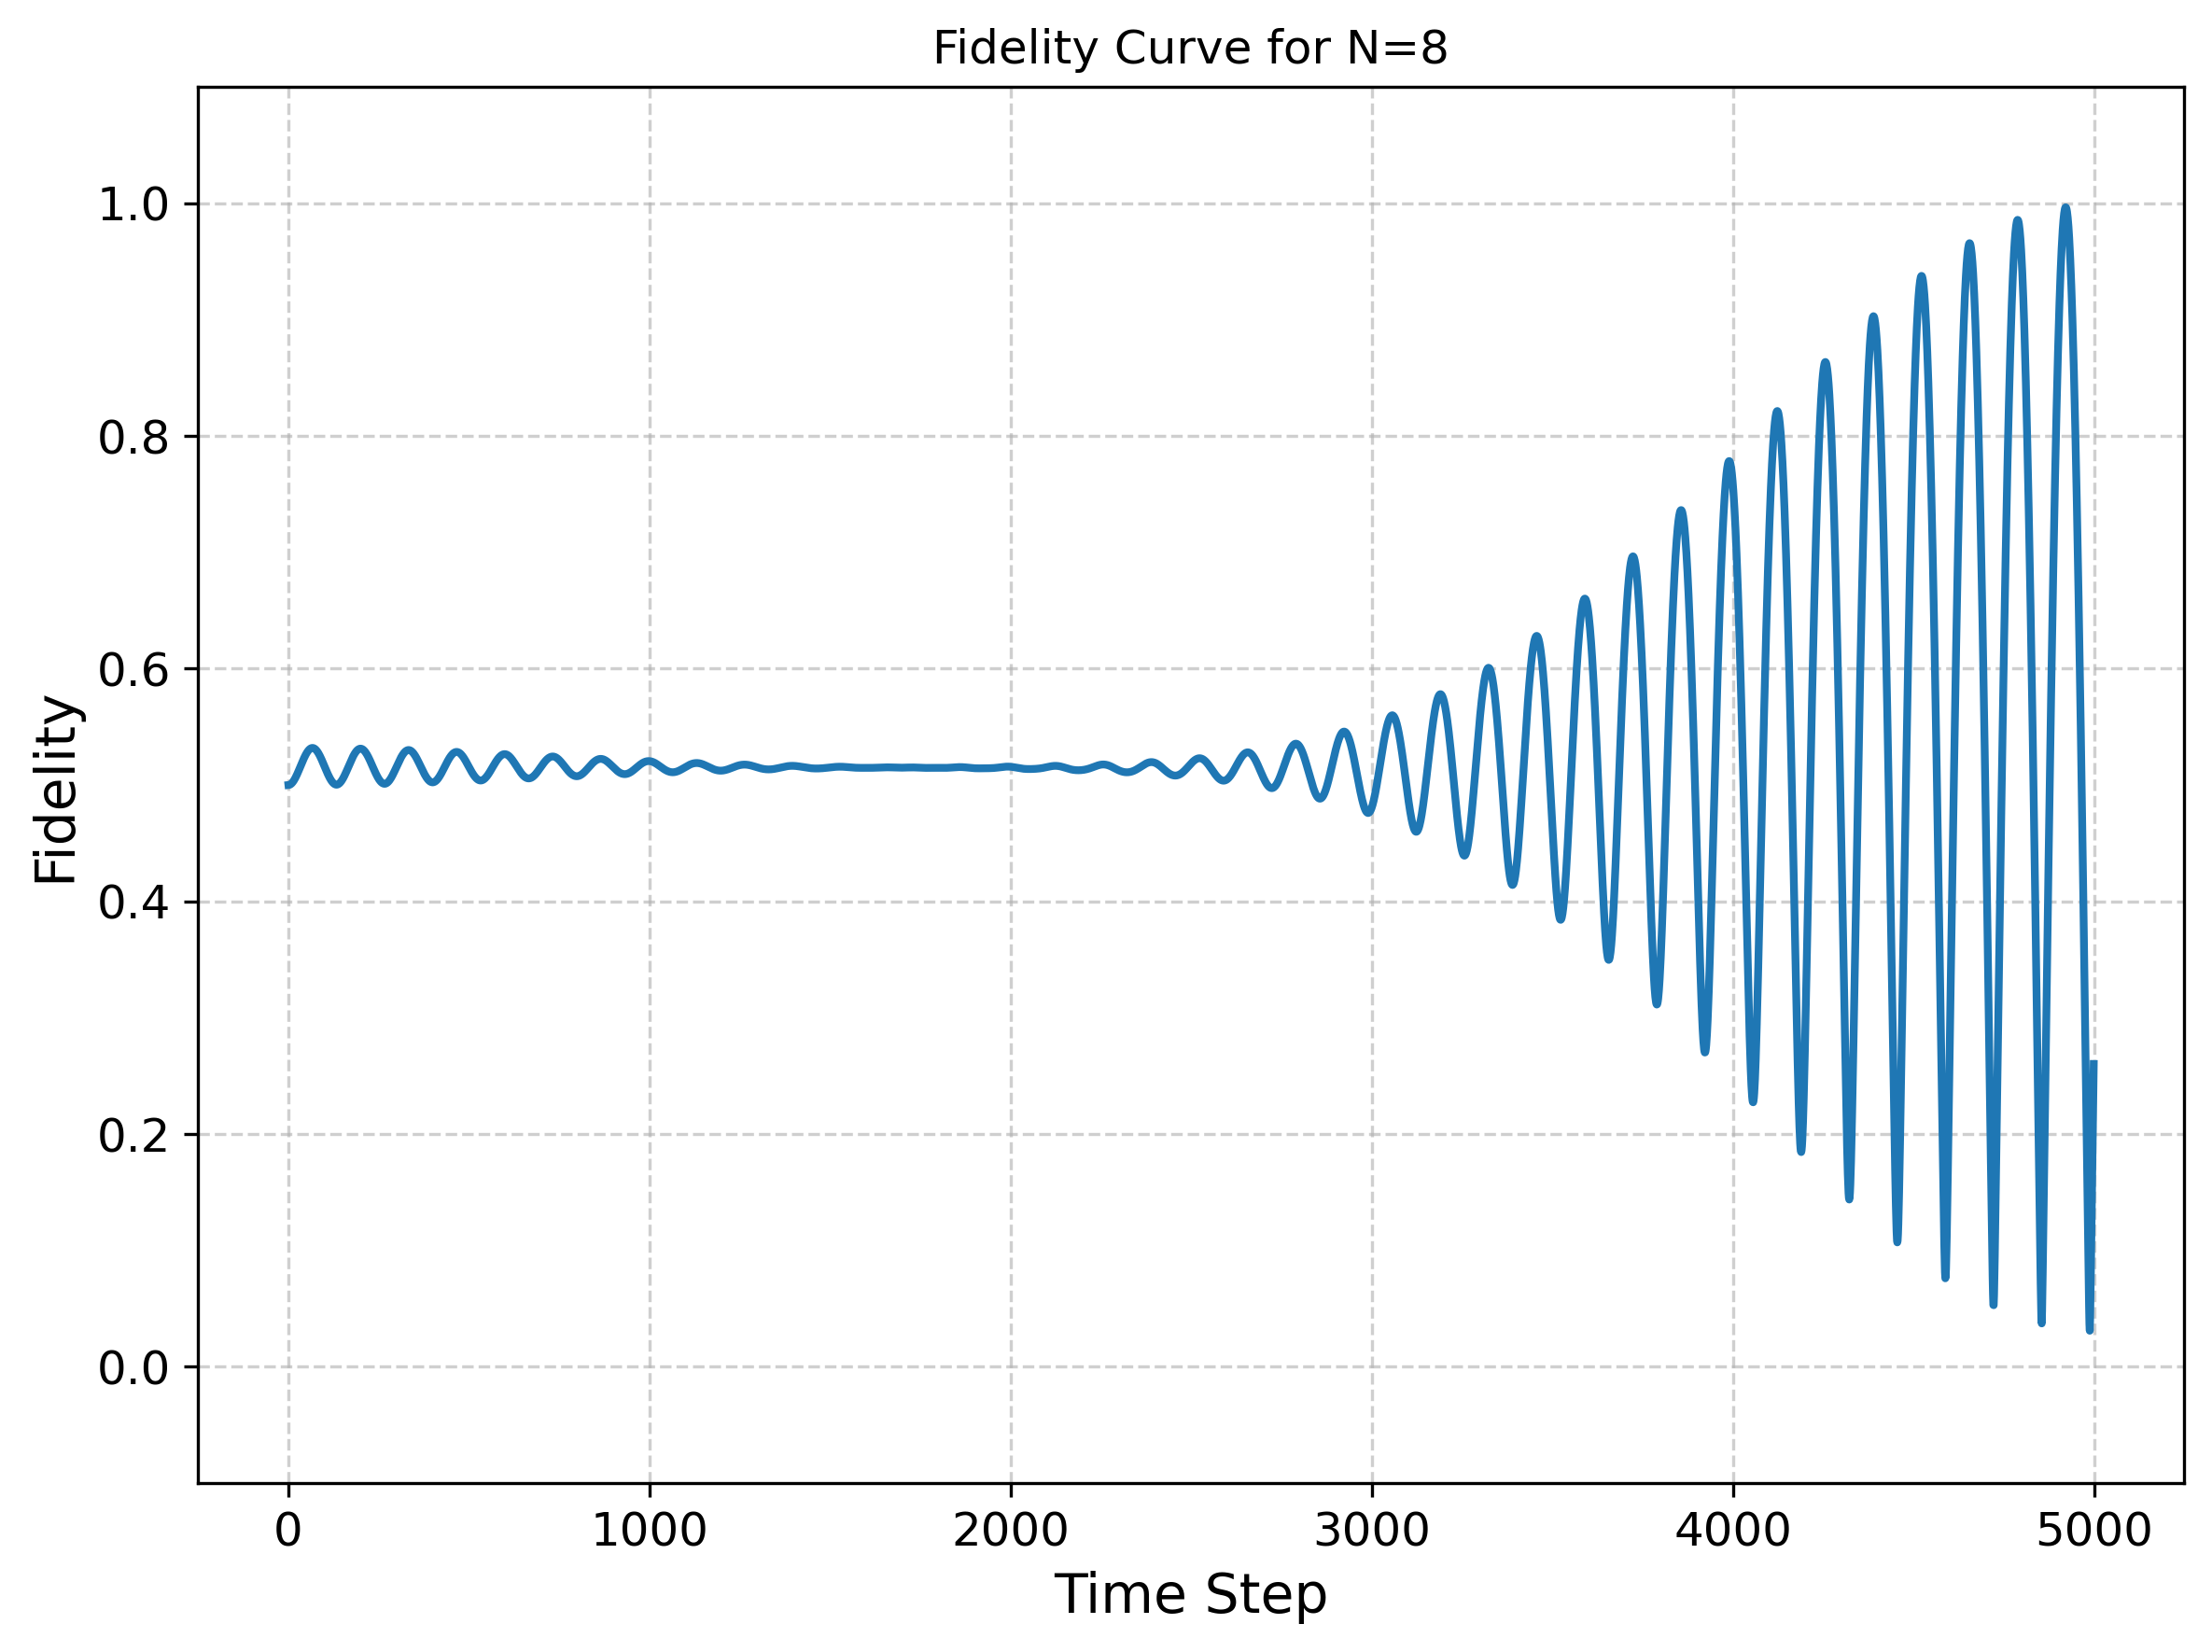

In [46]:
plots.plot_fidelity(fidelity, N)

In [30]:
print(fidelity[-1])

0.9789358322653473


In [22]:
N_list = range(5,12)
final_fidelities = []

for n in N_list:
    print(n)
    initial_state, target_state, reg_size = md.initialize_system(state_dictionary, n, encoding='dw', one_step=one_step)

    H_t = Ham.Hamiltonian(
            system_size=n,
        mode=mode,
        lambda_factor=lmd,
        global_J=J,
        register_size=reg_size,
        j_error=0,
        l_error=0, 
        z_error=0
    )

    if one_step == False:
        H_r = Ham.Hamiltonian(
                system_size=n,
            mode="reset",
            lambda_factor=lmd,
            global_J=J,
            register_size=reg_size,
            j_error=0,
            l_error=0, 
            z_error=0
    )
        
    if (one_step == True) or (encoding == 'st'):
        fidelity, observables, corr_f = dyn.OneStepAlgorithm(initial_state, target_state, H_t, ti, tf, Nsteps)
    elif one_step == False:
        fidelity, observables = dyn.TwoStepAlgorithm(initial_state, target_state, H_t, H_r, ti, tf, Nsteps)

    print(fidelity[-1])
    final_fidelities.append(fidelity[-1])
    

5
0.9956120305136024
6
0.9897304643479816
7
0.9789358322653473
8
0.9606799798855584
9
0.9321876011346406
10
0.8906057748463874
11
0.8292737599758124


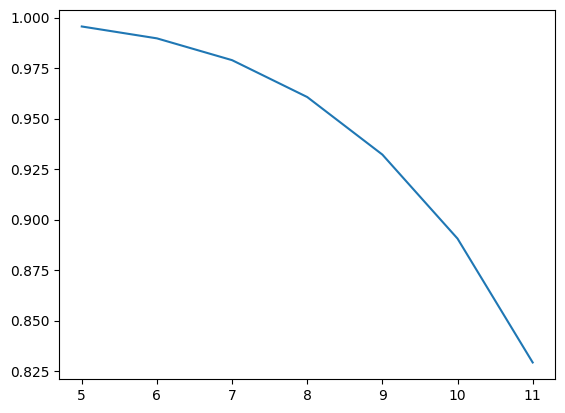

In [23]:
plt.plot(N_list, final_fidelities)

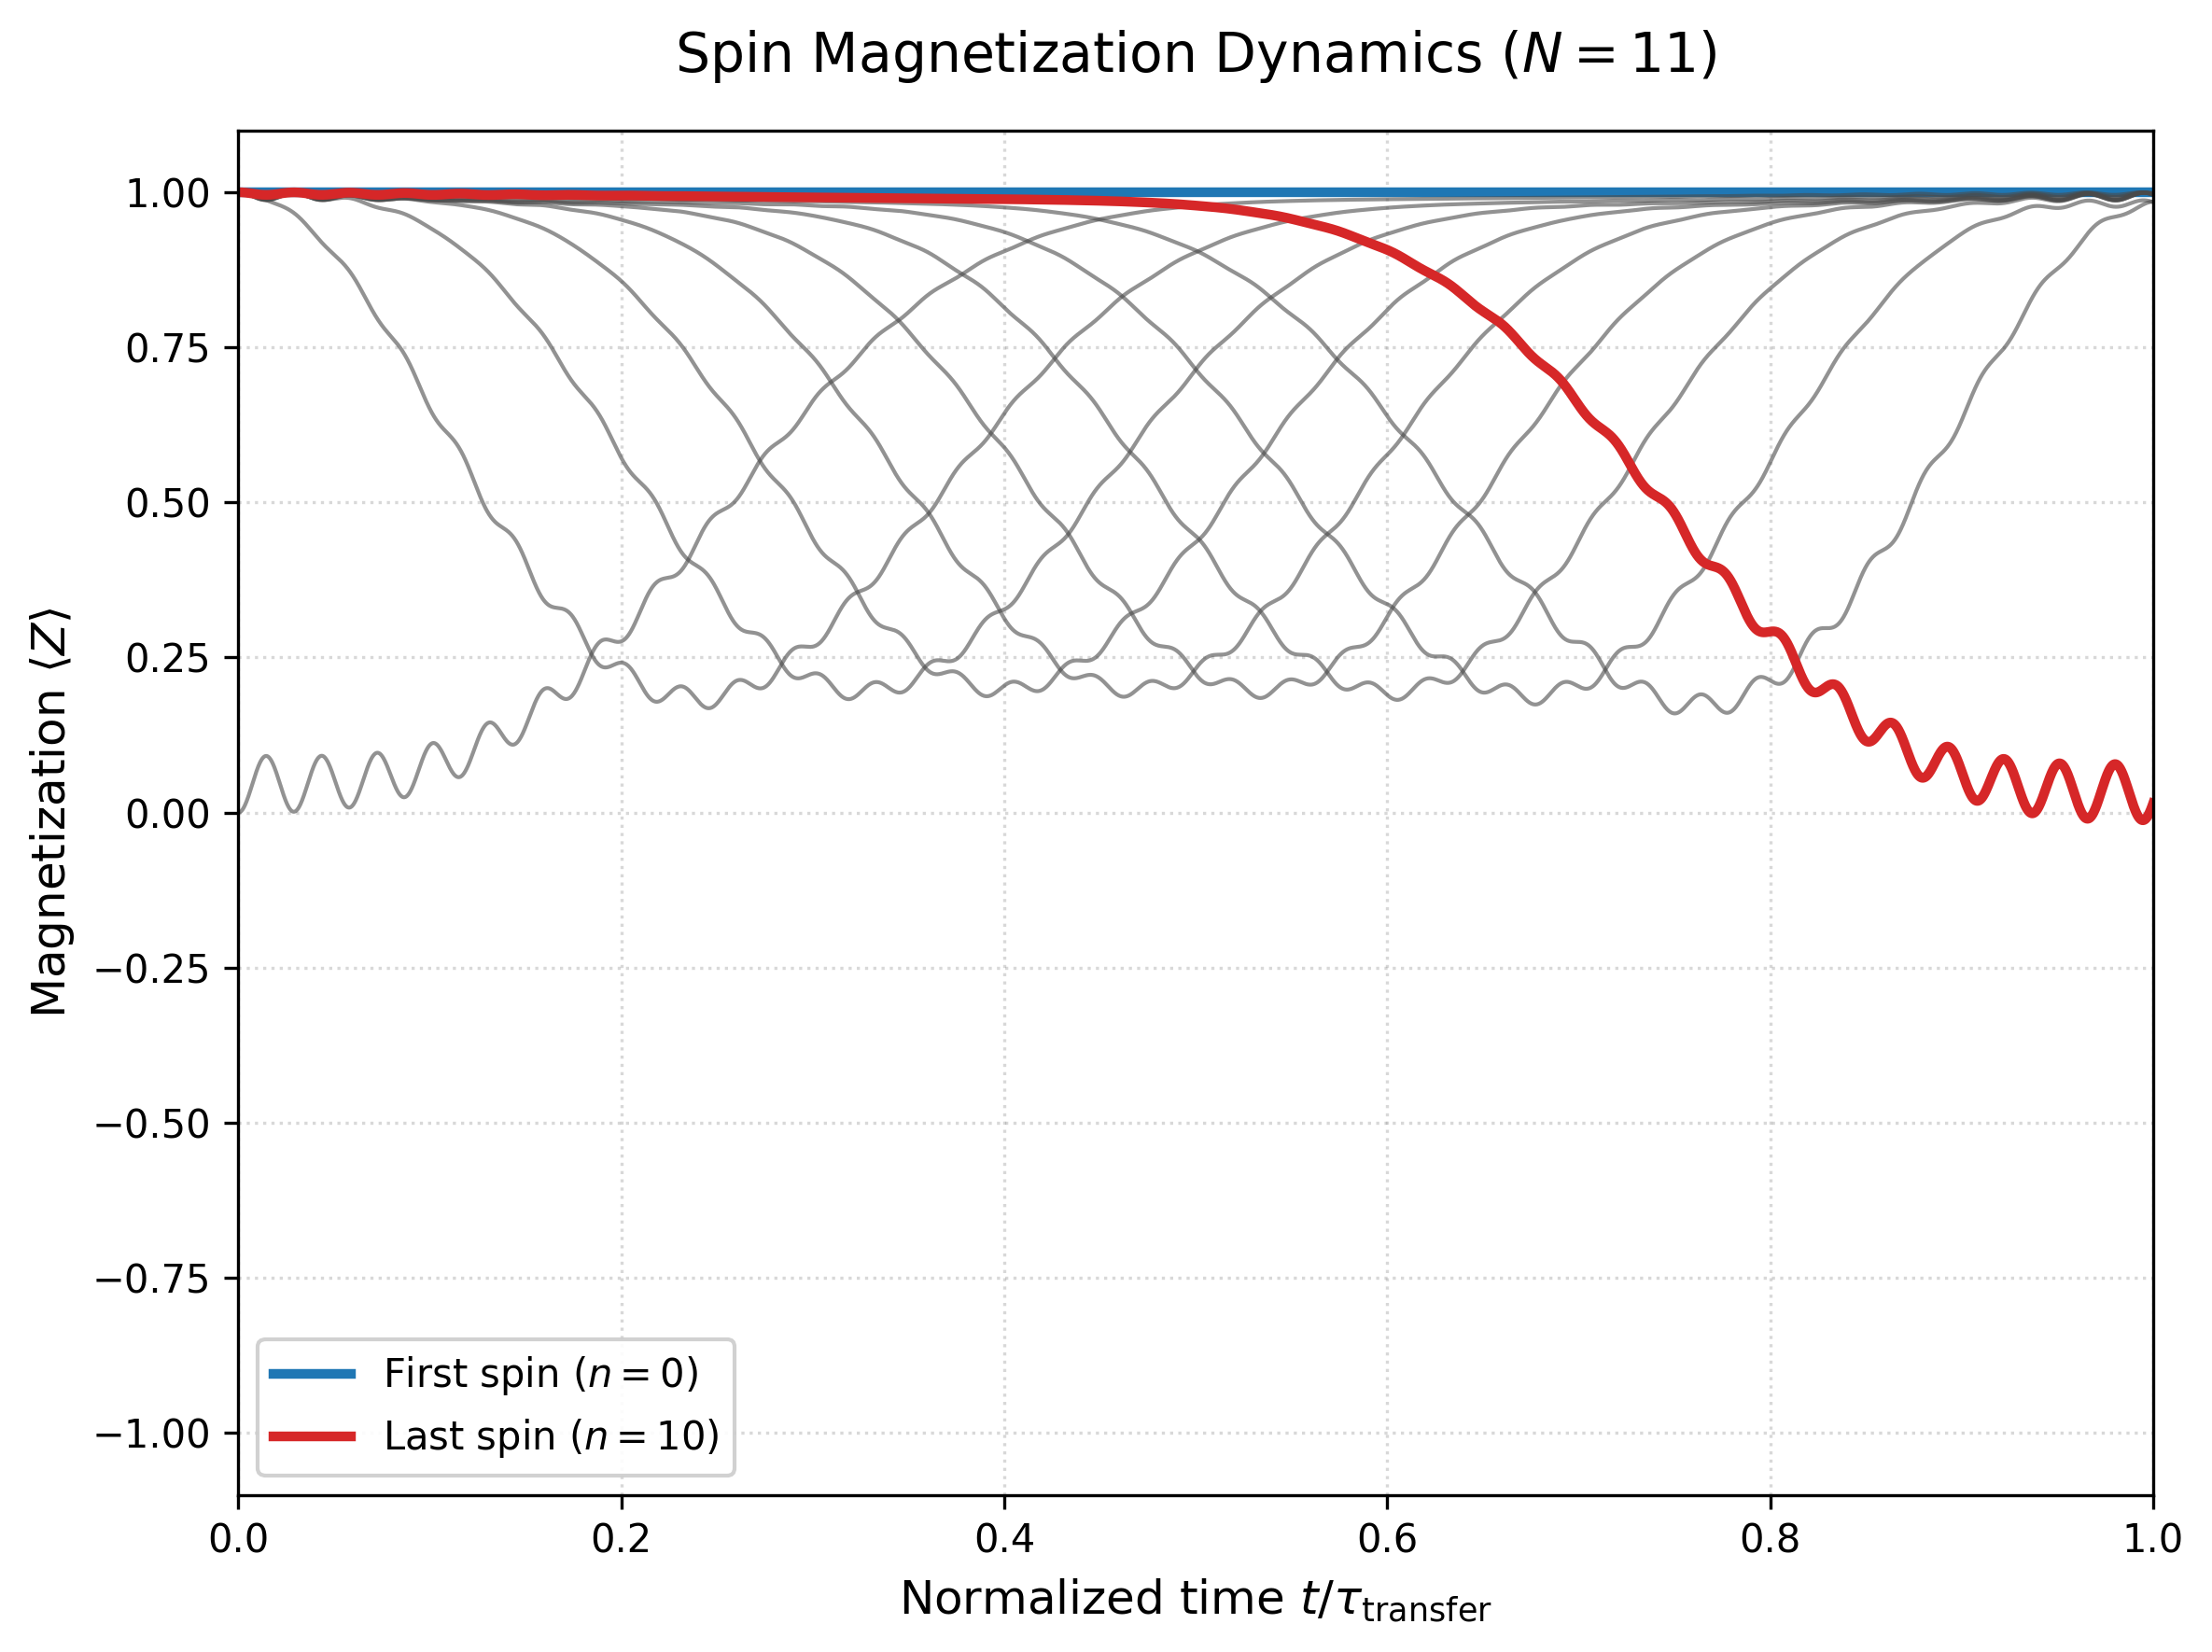

In [24]:
plots.plot_expectations(observables['Sz'], n)

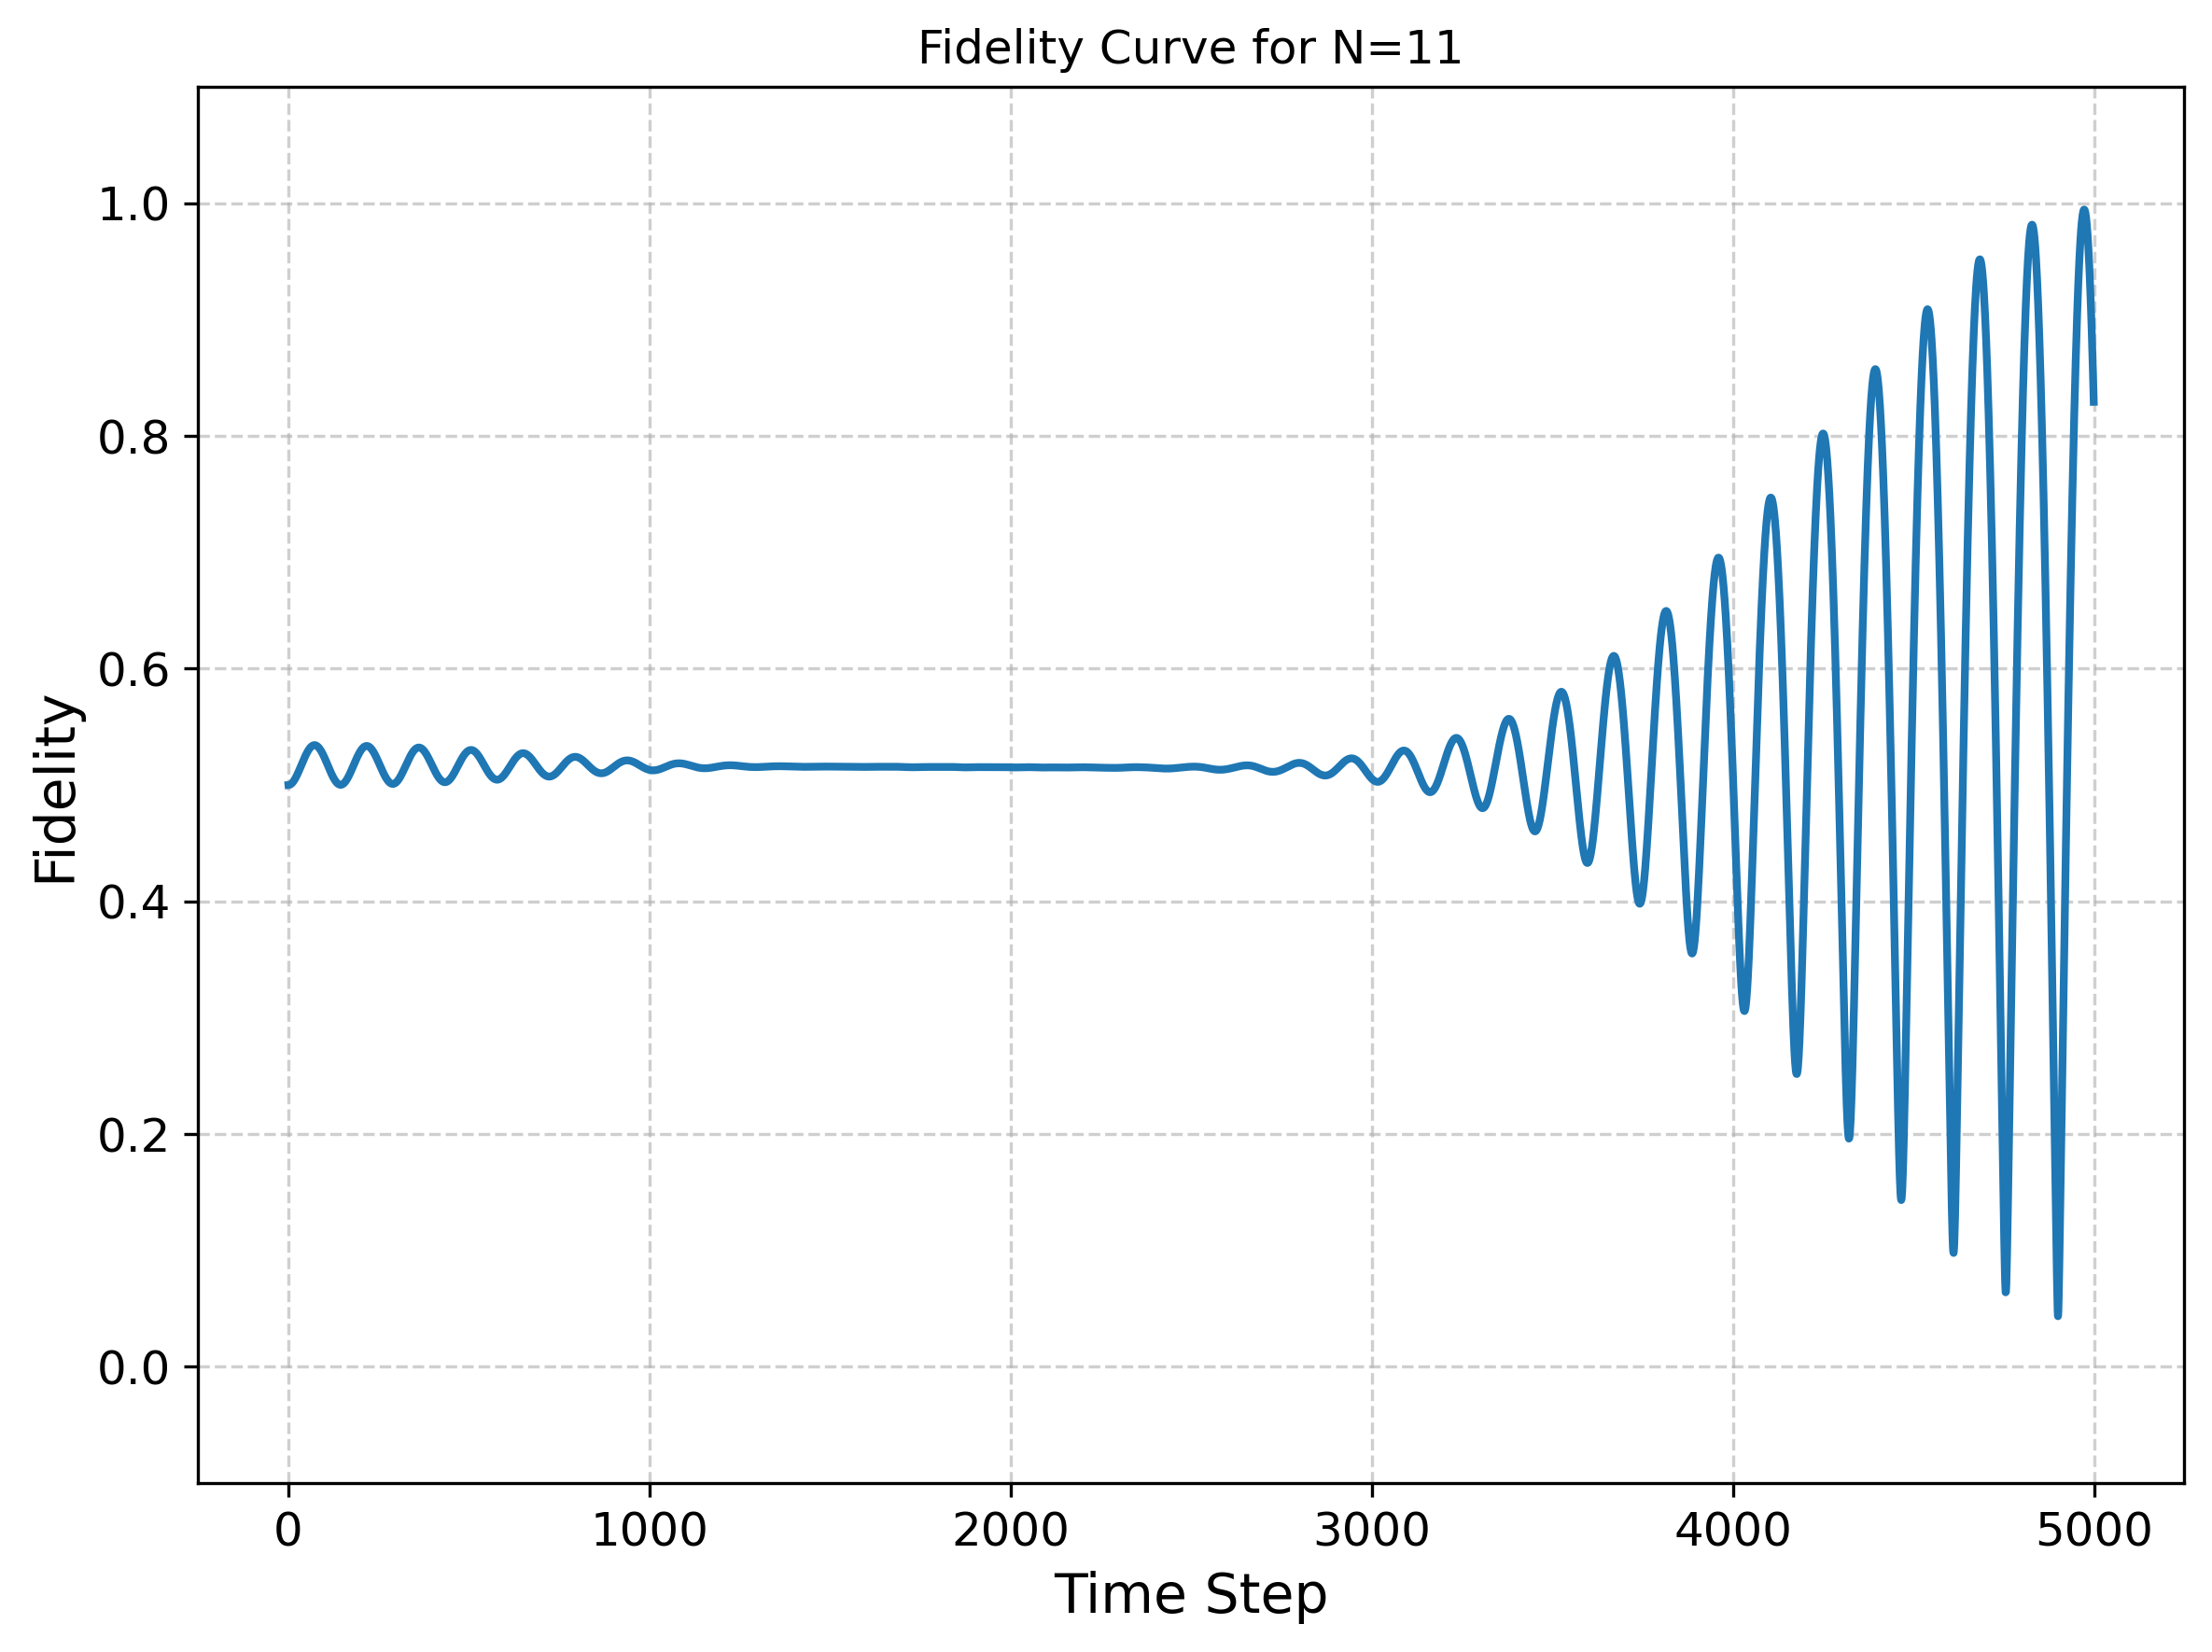

In [25]:
plots.plot_fidelity(fidelity, n)